# DataCleaning and Analysis

In [372]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot  as plt
import seaborn as sns

#### Read the data

In [373]:
df = pd.read_csv('../EDA/readingDataSet/telecom_churn_data.csv')
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


#### Categorical and Numerical columns

In [374]:
cat = df.select_dtypes(include='object').columns
num = df.select_dtypes(exclude='object').columns

#### Data quick checks

In [375]:
cat,num

(Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object'),
 Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
        'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
        'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
        'customer_support_calls', 'churn'],
       dtype='object'))

In [376]:
print("Shape: ",df.shape)
print("Size: ",df.size)
print("Length: ",len(df))

Shape:  (2000, 16)
Size:  32000
Length:  2000


In [377]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [378]:
df.tail()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,2015,999961,414-1496,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [380]:
df['churn'].unique()

array([ 0.,  1., nan])

- Mode is cat

- Mean is Numerical

- Here churn is reading as numerical originally it is cat

- client is already encoded

In [381]:
df['no_of_days_subscribed'].unique()

array([ 62, 149, 126, 131, 191,  65,  59,  50, 205,  63, 114, 107,  84,
       142, 137, 100,  99, 115, 194, 104, 170,  76,  94,  81, 119, 138,
       124,  48, 106, 161,  89, 105,  67, 129,  56,  95,  37,  80, 190,
       168, 166,  42,  96,  77,  54,  41,  53,  98,  90, 146,  51,  97,
        55,  74,  86,  75,  27, 163,  44,  92,  45, 140, 122, 132, 103,
       134, 109,  21, 167,  35, 177, 118,  87, 135, 144, 148,  70,  16,
        83,  72,  30,  93,  91, 110, 128,  66,  38,  64, 172,  82,  39,
       108, 162,  10, 156, 101,  68, 111, 112, 127,  61, 158, 192, 136,
       116,  49,  40, 130, 125,   9,  57,  88, 151, 113,  58,  79, 179,
        17, 117, 152, 159, 155,  43, 123,   5, 186, 139,  19, 147,  34,
        73, 121,  78, 153, 171,  85,  29, 102, 165,  36, 150,  31, 201,
       174, 141, 157, 178,  18, 120,  22, 176, 182, 189, 154,   1, 143,
        24,   2,   3, 181, 164, 193, 210,  71,  13,  69, 195, 173,  52,
       133,  46, 184,  47, 145, 197,  25, 199,  60,  32,  33,  2

- Understand the data => Understand about column meaning 

- basic behaviour number of days means numberical 

- but if null value is replace with mean it give the float but days cant be float

- we need to round off

In [382]:
df['no_of_days_subscribed'].mean()

np.float64(99.75)

**Removing the CustomerId, Phonenumber and Year**

In [383]:
df= df.drop(axis=1,columns=df[['phone_no']])

In [384]:
df

,year,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [385]:
df= df.drop(axis=1,columns=df[['year']])

In [386]:
df= df.drop(axis=1,columns=df[['customer_id']])

#### Missing value analysis

Since the gender is the cat column we use mode for it 

for replacing the null values her we got mode for the gender as male

In [387]:
df.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [388]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

Since the days cant be float we round mean of it to integer and replace with null values

In [389]:
rounded_Max_days = round(df['maximum_days_inactive'].mean())
df['maximum_days_inactive'] = df['maximum_days_inactive'].fillna(rounded_Max_days)

The churn is numerical but actually cat as we described above

In [390]:
churn_mode = df['churn'].mode()[0]
# churn_mode
df['churn'] = df['churn'].fillna(churn_mode)

In [391]:
df.isnull().sum()

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   no_of_days_subscribed   2000 non-null   int64  
 3   multi_screen            2000 non-null   object 
 4   mail_subscribed         2000 non-null   object 
 5   weekly_mins_watched     2000 non-null   float64
 6   minimum_daily_mins      2000 non-null   float64
 7   maximum_daily_mins      2000 non-null   float64
 8   weekly_max_night_mins   2000 non-null   int64  
 9   videos_watched          2000 non-null   int64  
 10  maximum_days_inactive   2000 non-null   float64
 11  customer_support_calls  2000 non-null   int64  
 12  churn                   2000 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 203.3+ KB


#### Data quality checks or Data cleaning

In [393]:
for col in df.columns:
    unique_types = df[col].apply(type).nunique()
    if unique_types > 1:
        print(f"Column '{col}' has mixed data types")

There is not column with mutiple types

#### Categorical Column Analysis

In [394]:
labels = df.select_dtypes(include='object').columns
for col in labels:
    print(df[col].value_counts())

gender
Male      1077
Female     923
Name: count, dtype: int64
multi_screen
no     1802
yes     198
Name: count, dtype: int64
mail_subscribed
no     1430
yes     570
Name: count, dtype: int64


In [395]:
df['gender'].value_counts(normalize=True) * 100

gender
Male      53.85
Female    46.15
Name: proportion, dtype: float64

In [396]:
df['churn'].value_counts(normalize=True) * 100

churn
0.0    86.9
1.0    13.1
Name: proportion, dtype: float64

In [397]:
pd.crosstab(df['gender'], df['churn'])

churn,0.0,1.0
gender,,
Female,797,126
Male,941,136


<Axes: xlabel='gender'>

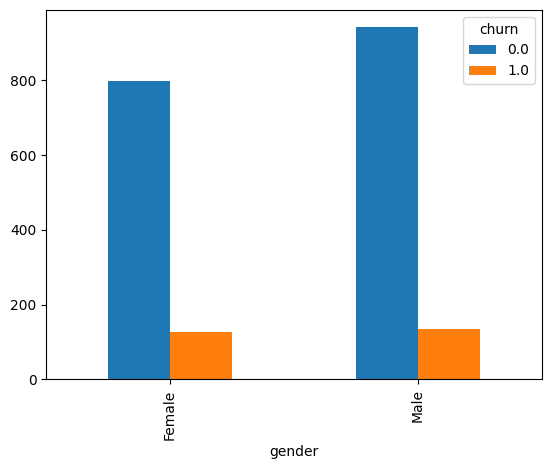

In [398]:
churn_counts = pd.crosstab(df['gender'], df['churn'])

churn_counts.plot(kind='bar')

<Axes: xlabel='gender', ylabel='count'>

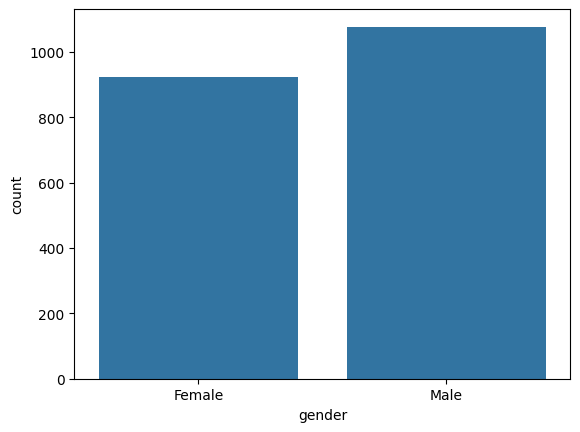

In [399]:
import warnings 
warnings.filterwarnings('ignore')


sns.countplot(x='gender', data=df)


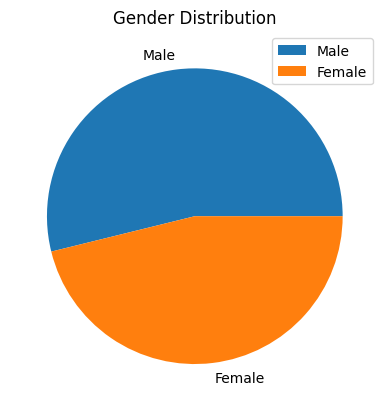

In [400]:
df['gender'].value_counts().plot(kind='pie',legend=True,)
plt.title('Gender Distribution')
plt.ylabel('')  # Removes y-axis label
plt.show()


#### Numerical column Analysis

In [401]:
df.describe()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.247000,1.547000,0.131000
std,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.803937,1.315164,0.337485
min,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


#### Outlier analysis

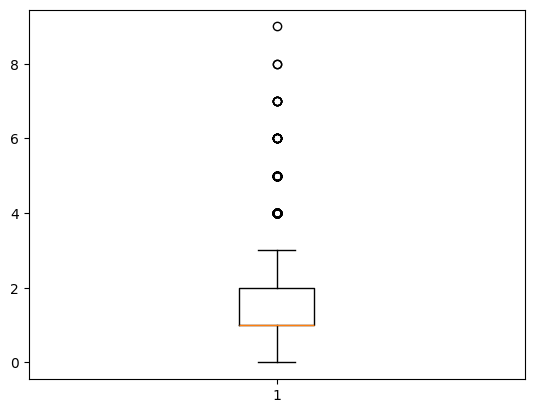

In [402]:
plt.boxplot(df['customer_support_calls'])
plt.show()

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   no_of_days_subscribed   2000 non-null   int64  
 3   multi_screen            2000 non-null   object 
 4   mail_subscribed         2000 non-null   object 
 5   weekly_mins_watched     2000 non-null   float64
 6   minimum_daily_mins      2000 non-null   float64
 7   maximum_daily_mins      2000 non-null   float64
 8   weekly_max_night_mins   2000 non-null   int64  
 9   videos_watched          2000 non-null   int64  
 10  maximum_days_inactive   2000 non-null   float64
 11  customer_support_calls  2000 non-null   int64  
 12  churn                   2000 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 203.3+ KB


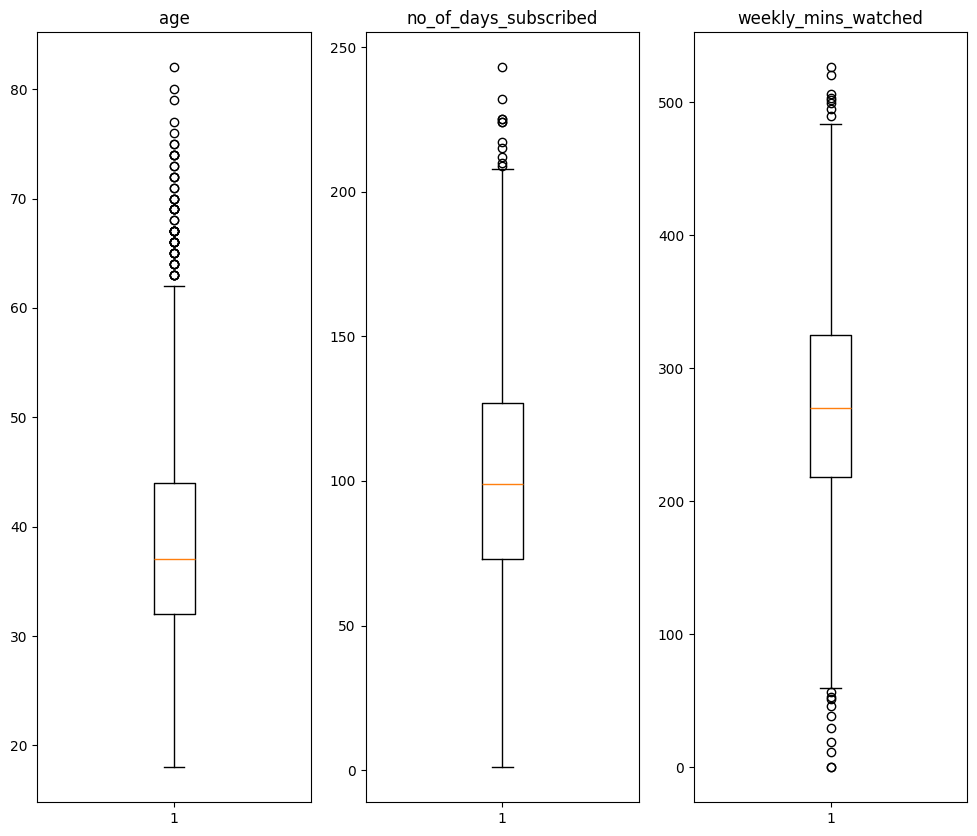

In [404]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1).boxplot(df['age'])
plt.title('age')
plt.subplot(1,3,2).boxplot(df['no_of_days_subscribed'])
plt.title('no_of_days_subscribed')
plt.subplot(1,3,3).boxplot(df['weekly_mins_watched'])
plt.title('weekly_mins_watched')


plt.show()

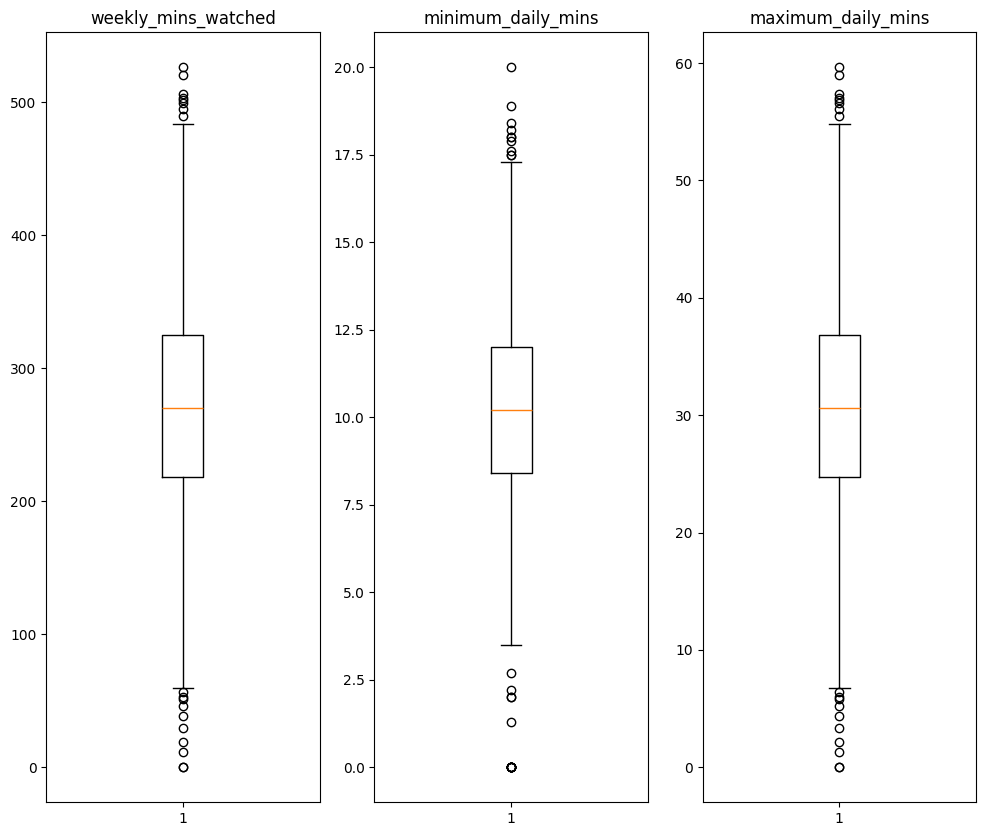

In [405]:
plt.figure(figsize=(12,10))

plt.subplot(1,3,1).boxplot(df['weekly_mins_watched'])
plt.title('weekly_mins_watched')
plt.subplot(1,3,2).boxplot(df['minimum_daily_mins'])
plt.title('minimum_daily_mins')
plt.subplot(1,3,3).boxplot(df['maximum_daily_mins'])
plt.title('maximum_daily_mins')

plt.show()

#### Bi variate and Multi variate analysis

In [406]:
num_labels = df.select_dtypes(exclude='object').columns
corr = df[num_labels].corr()
corr

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
age,1.000000,0.038822,0.016316,-0.000676,0.016328,0.016645,0.013076,0.006334,0.000618,0.011777
no_of_days_subscribed,0.038822,1.000000,0.000657,0.016329,0.000652,-0.001967,0.019414,0.019338,0.013419,0.002517
weekly_mins_watched,0.016316,0.000657,1.000000,-0.017332,1.000000,0.037715,0.018619,-0.014018,-0.036848,0.162876
minimum_daily_mins,-0.000676,0.016329,-0.017332,1.000000,-0.017330,0.008430,0.050739,0.923740,-0.003943,0.066646
maximum_daily_mins,0.016328,0.000652,1.000000,-0.017330,1.000000,0.037716,0.018621,-0.014018,-0.036854,0.162874
weekly_max_night_mins,0.016645,-0.001967,0.037715,0.008430,0.037716,1.000000,-0.000298,0.026565,-0.003965,0.006917
videos_watched,0.013076,0.019414,0.018619,0.050739,0.018621,-0.000298,1.000000,0.033929,-0.001201,-0.019314
maximum_days_inactive,0.006334,0.019338,-0.014018,0.923740,-0.014018,0.026565,0.033929,1.000000,-0.001523,0.044778
customer_support_calls,0.000618,0.013419,-0.036848,-0.003943,-0.036854,-0.003965,-0.001201,-0.001523,1.000000,0.204774
churn,0.011777,0.002517,0.162876,0.066646,0.162874,0.006917,-0.019314,0.044778,0.204774,1.000000


<Axes: >

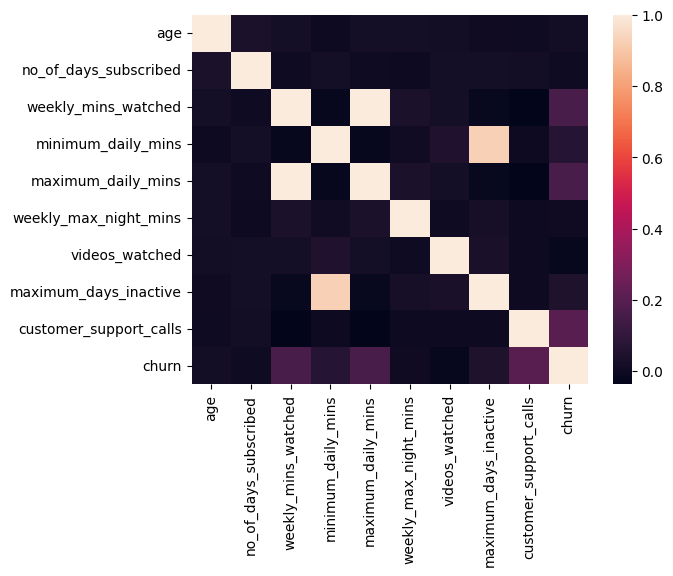

In [407]:
sns.heatmap(corr)

In [408]:
churn_corr = corr['churn'].sort_values(ascending=False)
churn_corr

churn                     1.000000
customer_support_calls    0.204774
weekly_mins_watched       0.162876
maximum_daily_mins        0.162874
minimum_daily_mins        0.066646
maximum_days_inactive     0.044778
age                       0.011777
weekly_max_night_mins     0.006917
no_of_days_subscribed     0.002517
videos_watched           -0.019314
Name: churn, dtype: float64

# Feature Engineering

### Encoding 

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   no_of_days_subscribed   2000 non-null   int64  
 3   multi_screen            2000 non-null   object 
 4   mail_subscribed         2000 non-null   object 
 5   weekly_mins_watched     2000 non-null   float64
 6   minimum_daily_mins      2000 non-null   float64
 7   maximum_daily_mins      2000 non-null   float64
 8   weekly_max_night_mins   2000 non-null   int64  
 9   videos_watched          2000 non-null   int64  
 10  maximum_days_inactive   2000 non-null   float64
 11  customer_support_calls  2000 non-null   int64  
 12  churn                   2000 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 203.3+ KB


In [410]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


For tree-based models like:

- Decision Tree

- Random Forest

- XGBoost

label encoder < OnehotEncoder because the tree based model need more columns 

travesal so that its better for them 

| Column          | Recommended Encoding                        |
|-----------------|---------------------------------------------|
| gender          | OneHotEncoder (if distance-based model)     |
| multi_screen    | LabelEncoder (yes=1, no=0)                  |
| mail_subscribed | LabelEncoder (yes=1, no=0)                  |



#### LabelEncoder

In [411]:
from sklearn.preprocessing import LabelEncoder

In [412]:
le = LabelEncoder()
le

LabelEncoder()

In [413]:
df['multi_screen'] = le.fit_transform(df['multi_screen'])
df['mail_subscribed'] = le.fit_transform(df['mail_subscribed'])

In [414]:
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,54,75,0,1,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,Male,45,127,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,Male,53,94,0,0,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,Male,40,94,0,0,178.05,10.4,20.18,100,6,3.0,3,0.0


In [415]:
df= pd.get_dummies( df, columns=['gender'], drop_first=False).astype(int)

In [416]:
df

,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_Female,gender_Male
0,36,62,0,0,148,12,16,82,1,4,1,0,1,0
1,39,149,0,0,294,7,33,87,3,3,2,0,1,0
2,65,126,0,0,87,11,9,91,1,4,5,1,1,0
3,24,131,0,1,321,9,36,102,4,3,3,0,1,0
4,40,191,0,0,243,10,27,83,7,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,54,75,0,1,182,11,20,97,5,4,2,0,1,0
1996,45,127,0,0,273,9,30,116,3,3,1,0,0,1
1997,53,94,0,0,128,15,14,110,16,5,0,0,0,1
1998,40,94,0,0,178,10,20,100,6,3,3,0,0,1


### Scaling 

In [417]:
for col in df.columns:
    print(col,":",df[col].min(),df[col].max())

age : 18 82
no_of_days_subscribed : 1 243
multi_screen : 0 1
mail_subscribed : 0 1
weekly_mins_watched : 0 526
minimum_daily_mins : 0 20
maximum_daily_mins : 0 59
weekly_max_night_mins : 42 175
videos_watched : 0 19
maximum_days_inactive : 0 6
customer_support_calls : 0 9
churn : 0 1
gender_Female : 0 1
gender_Male : 0 1


Better approach is if any value >100 we need scale it 

In [418]:
from sklearn.preprocessing import MinMaxScaler

In [419]:
mm = MinMaxScaler()
mm

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [421]:
df['no_of_days_subscribed'] = mm.fit_transform(df[['no_of_days_subscribed']])
df['weekly_mins_watched'] = mm.fit_transform(df[['weekly_mins_watched']])
df['weekly_max_night_mins'] = mm.fit_transform(df[['weekly_max_night_mins']])

In [422]:
df

,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_Female,gender_Male
0,36,0.252066,0,0,0.281369,12,16,0.300752,1,4,1,0,1,0
1,39,0.611570,0,0,0.558935,7,33,0.338346,3,3,2,0,1,0
2,65,0.516529,0,0,0.165399,11,9,0.368421,1,4,5,1,1,0
3,24,0.537190,0,1,0.610266,9,36,0.451128,4,3,3,0,1,0
4,40,0.785124,0,0,0.461977,10,27,0.308271,7,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,54,0.305785,0,1,0.346008,11,20,0.413534,5,4,2,0,1,0
1996,45,0.520661,0,0,0.519011,9,30,0.556391,3,3,1,0,0,1
1997,53,0.384298,0,0,0.243346,15,14,0.511278,16,5,0,0,0,1
1998,40,0.384298,0,0,0.338403,10,20,0.436090,6,3,3,0,0,1


In [ ]:
for col in df.columns:
    print(col,":",df[col].min(),df[col].max())

age : 18 82
no_of_days_subscribed : 0.0 1.0
multi_screen : 0 1
mail_subscribed : 0 1
weekly_mins_watched : 0.0 1.0
minimum_daily_mins : 0 20
maximum_daily_mins : 0 59
weekly_max_night_mins : 0.0 0.9999999999999999
videos_watched : 0 19
maximum_days_inactive : 0 6
customer_support_calls : 0 9
churn : 0 1
gender_Female : 0 1
gender_Male : 0 1
